In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import imageio

In [4]:
def mean_shift(img, h=0.5, n=10):
    H, W = img.shape[:2]
    img1 = img.copy()
    img2 = img.copy()
    gif_arr = []
    for i in range(n):
        for y in range(H):
            for x in range(W):
                k = np.square((img1[y,x]-img1)/h).sum(-1)
                k = np.exp(-k)
                a = ((img1-img1[y,x]) * np.expand_dims(k,-1)).sum((0,1))
                grad = a/k.sum()
                img2[y,x] +=  grad
                if x%20 == 0 and y%20==0:
                    gif_arr.append((255*img2).astype(np.uint8))
            print('Progress: {:.02f}{}'.format(100*(i*H+y+1)/n/H,'%'), end='\r')
        img1 = img2
    return img1, gif_arr

In [15]:
img = Image.open('imgs/test.jpg').resize((200, 150))
img = np.array(img)/255
img_s, gif_arr = mean_shift(img, h=0.1, n=15)

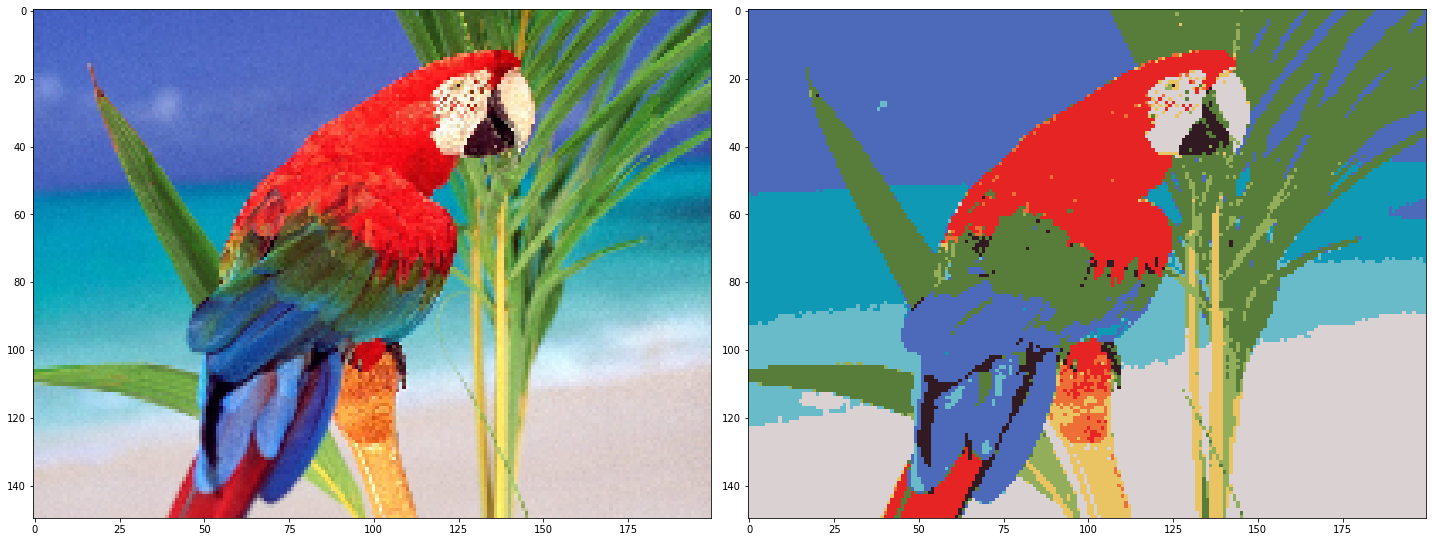

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_s)
plt.tight_layout()
plt.savefig('a.jpg')
plt.show()

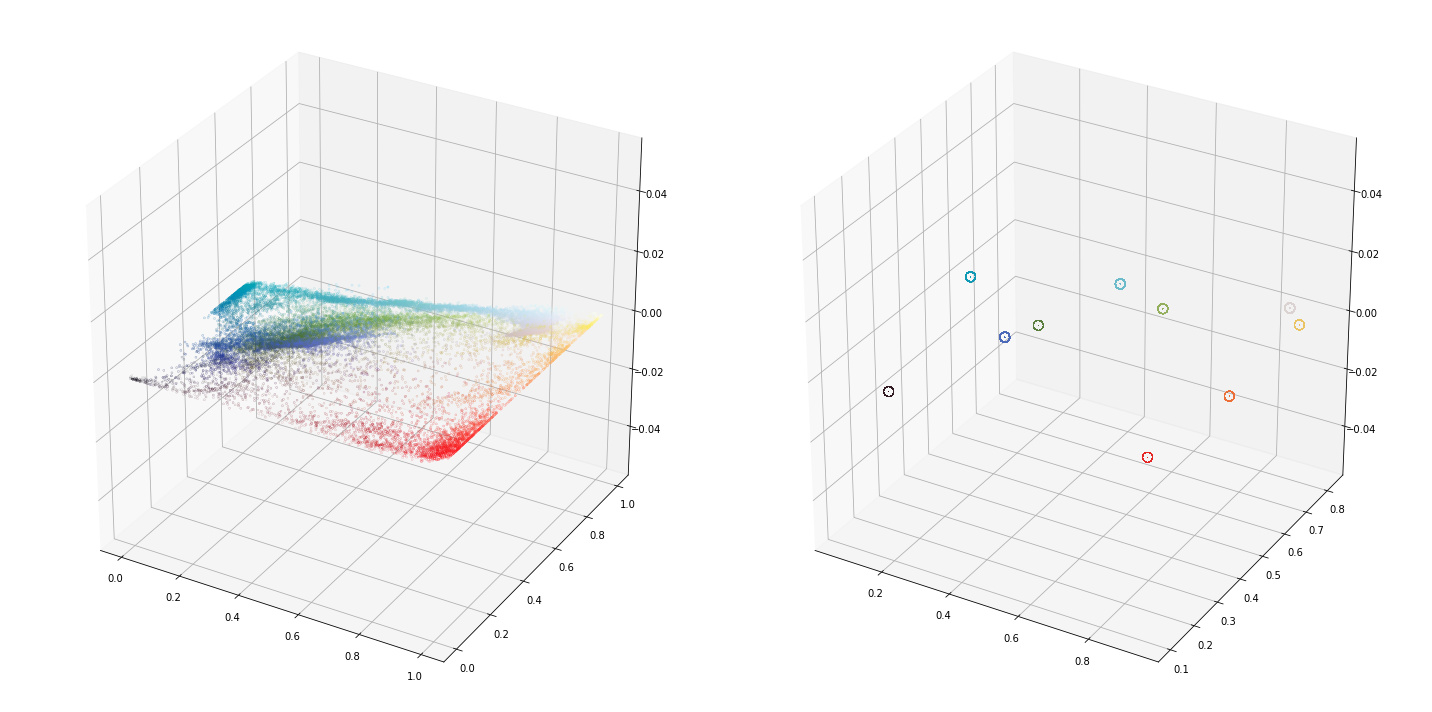

In [32]:
colors = img.reshape(-1,3)
plt.figure(figsize=(20,10))
plt.subplot(121, projection='3d')
plt.scatter(colors[:,0], colors[:,1], colors[:,2], c=colors, marker='.', linewidths=2)

colors = img_s.reshape(-1,3)
plt.subplot(122, projection='3d')
plt.scatter(colors[:,0], colors[:,1], colors[:,2], c=colors, marker='o', linewidths=10)
plt.tight_layout()
plt.savefig('b.jpg')
plt.show()

In [21]:
imageio.mimsave('movie.gif', gif_arr)